# **Project 2**, APS1070 Winter 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Feb 28, 11 PM - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Ningcan Sun
*   Student Number: 1003270435

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? <font color ='Blue'>**284807** 
* What features in the dataset are present aside from the 28 main features? <font color ='Blue'>**'Time', 'Amount', 'Class'** 
* Which column contains the targets?  <font color ='Blue'>**column'Class'contains targets** 
* What is the meaning of target values? <font color ='Blue'>**The class column, 1 means card fraud and 0 means non-fraud**  

In [1]:
pip install wget

In [2]:
import wget

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, f1_score,recall_score,precision_score
df = pd.read_csv('creditcard.csv')

In [4]:
# How many rows are there
df.shape

(284807, 31)

#### <font color = 'blue'>  - There are 284807 rows

In [5]:
# What features in the dataset are present aside from the 28 main features?
df.columns[0],df.columns[29],df.columns[30]

('Time', 'Amount', 'Class')

#### <font color = 'blue'> - The feature in the dataset are present aside from the 28 main features are "Time", "Amount", "Class"

In [6]:
#Which column contains the targets?
df.columns[-1]

'Class'

#### <font color = 'blue'>  - column contains the targets is "Class"

In [7]:
# What is the meaning of target values?

#### <font color = 'blue'> - The class column, 1 means card fraud and 0 means non-fraud

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? <font color ='Blue'>**Class 0 is 99.82%, Class 1 is 0.17%**  
    
    
* Is this data considered balanced or unbalanced? Why is this the case? <font color ='Blue'>**It is unbalanced data, the reason is which we can noticed that the percentage of the class 0 and the percentage of the class 1 are have a big difference. The number of the class 1 and the number of the class 0 is not similar, so it is unbalanced data.** 
    
    
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? <font color ='Blue'>**It is really important that the balance data is important, because if the data is unbalanced data, then it will cause the classification very difficult and the machine learning algorithms also will perform not good, and some matrics also not really useful. So using the balanced data is really important.For the knn, as we all know, it is use the distance to classify the classes, and if the data is unbalanced, then the classification will belonging to class which has higher percentage class. Saying directly, for our this data , most of data around are 'non fraud ' class, then no matter whether it is fraud class, it will be classified as 'fraud' class.**
    
    
* What metrics should we use to evaluate a model in such cases? <font color ='Blue'>**We should use the F1 score or recall. (1) The reason I would like to use the F1 is because it can give us a relatively combination result, because the bank do not want to detect the fraud as non-fraud, which is a disater, but the bank also do not want detect non-fraud be the fraud,so the F1 score is ok to use. (2).The reason I would like to use recall because the false negative case is super bad, so we need to use the recall. Recall is TP/(TP+FN), if the FN increase, then the recall will decrease a lot.**


In [8]:
# percentage of entries in the datasets
number_of_class0=df.Class[df.Class==0].count()
number_of_class1=df.Class[df.Class==1].count()
percentage_of_class0 = number_of_class0/df.shape[0]
percentage_of_class1 = number_of_class1/df.shape[0]
print('the percentage of the class 0 is', percentage_of_class0)
print('the percentage of the class 1 is', percentage_of_class1)

the percentage of the class 0 is 0.9982725143693799
the percentage of the class 1 is 0.001727485630620034


#####  <font color = 'Blue'>  Question: check the whether the data is balanced or unbalanced
    
##### Answer: It is unbalanced data, which we can noticed that the percentage of the class 0 and the percentage of the class 1 are have a big difference. The number of the class 1 and the number of the class 0 is not similar, so it is unbalanced data.
    
#####  <font color = 'Blue'>  Question: Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?
    
##### Answer: It is really important that the balance data is important, because if the data is unbalanced data, then it will cause the classification very difficult and the machine learning algorithms also will perform not good, and some matrics also not really useful. So using the balanced data is really important. 
    
##### For the knn, as we all know, it is use the distance to classify the classes, and if the data is unbalanced, then the classification will belonging to class which has higher percentage class. Saying directly, for our this data , most of data around are 'non fraud ' class, then no matter whether it is fraud class, it will be classified as 'fraud' class.
    

#####  <font color = 'Blue'>  Question: What metrics should we use to evaluate a model in such cases
    
##### Answer: We should use the recall， because the false negative case is super bad, so we need to use the recall. Recall is TP/(TP+FN), if the FN increase, then the recall will decrease a lot. So I would like to use Recall.

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
### Split the data  ###
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:-2]
y = df.iloc[:,-1]

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0

# first let the train + validation be 85%, test be the 15%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)
# second we seperate the 20% from 85% be the validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2/0.85, random_state=40)

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

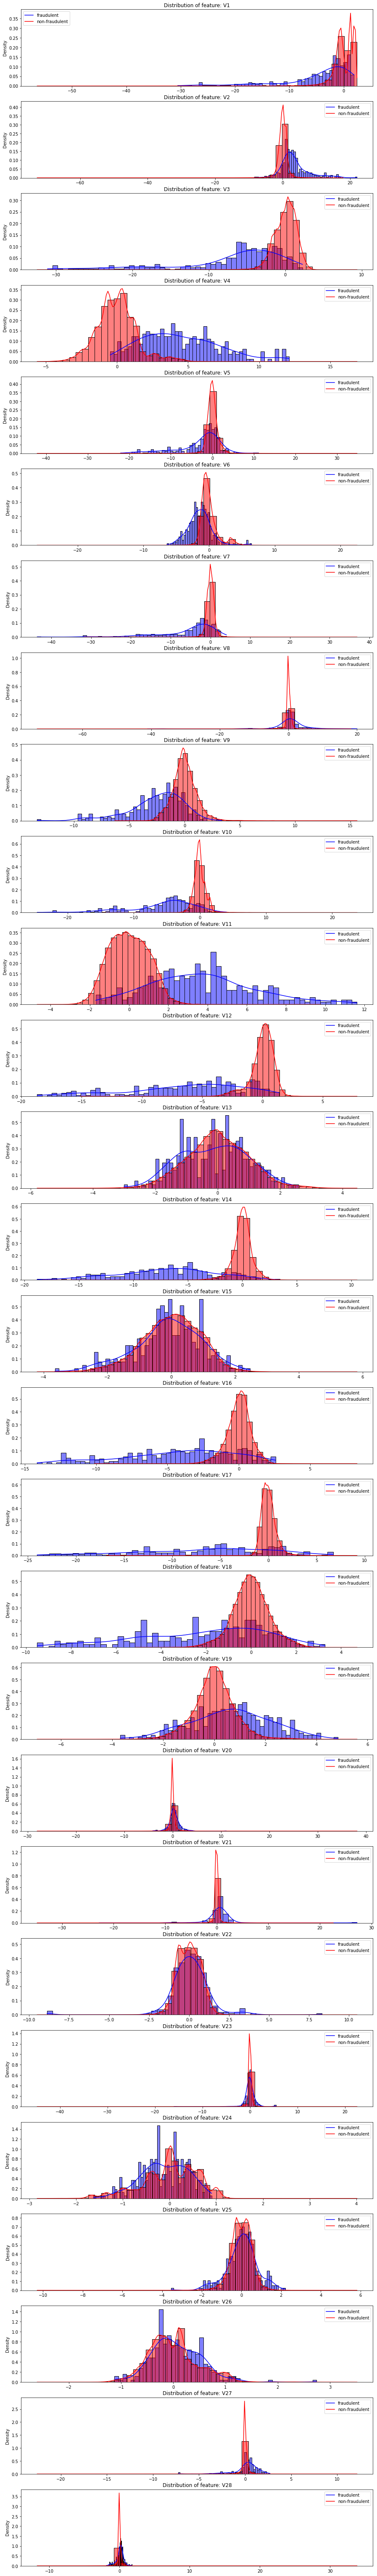

In [11]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

#### <font color = 'Blue'>Answer:  it can let us to almost know which factors is really important for detecting the fraud and which is really important for detecting, finding the useful feature is really important. Also it can let us can briefly know what is the fator's threshold to detect the fraud, for example, for the V14 variable, it is high and really sharp when the transaction is non-fraud, when the number larger than the -5, which can almost shows it is a non-fraud transaction. We can noticed that the V14, V17, V10 is really good features for detect the fraud transaction.

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


## Part 2, a

### Part 2, a, Step 1, 2, 3

In [12]:
# a 
from sklearn.mixture import GaussianMixture
from sklearn import metrics

score_training_total=[]
score_validation_total=[]
auc_train_total=[]
auc_val_total=[]

thres_train_total = []
thres_val_total = []

# Step 1 
for i in range (0,28):
    
    X_train_array=np.array(X_train.iloc[:,i]).reshape(-1,1)
    X_val_array = np.array(X_val.iloc[:,i]).reshape(-1,1)
    # Step 1
    gm = GaussianMixture(n_components=1, random_state=0, covariance_type = 'full')
    gm.fit(X_train_array)
    
    # Step 2 
    # use score samples to fit the score sample
    score_training = gm.score_samples(X_train_array)
    score_validation = gm.score_samples(X_val_array)
    score_training_total.append(score_training)
    score_validation_total.append(score_validation)
   
    
    
    # step 3 find the AUC for training & validation , f_train -> false positive for train
    # T_TRAIN-> true positive
    f_train, t_train, thres_train = metrics.roc_curve(y_train,1-score_training)
    f_val, t_val, thres_val = metrics.roc_curve(y_val,1-score_validation)
    auc_train= metrics.auc(f_train, t_train)
    auc_val= metrics.auc(f_val, t_val)
    auc_train_total.append(auc_train)
    auc_val_total.append(auc_val)
     
    #add the threshold

    thres_train_total.append(thres_train)
    thres_val_total.append(thres_val)
    
# create a df which show the auc_train and auc_val
auc = pd.DataFrame({'Auc_Train': auc_train_total, 'Auc_Validation': auc_val_total})
auc

,Auc_Train,Auc_Validation
0,0.692540,0.716118
1,0.848245,0.852456
2,0.870004,0.856759
3,0.889715,0.883280
4,0.761153,0.781160
5,0.727997,0.721413
6,0.865497,0.887163
7,0.774903,0.790317
8,0.799279,0.794323
9,0.910025,0.917279


### Part 2, a, Step 4

In [13]:
# step4 

# As the higher score of validation AUC has, the feature are better.
# decending the value and find the first 3
auc_sort = auc.sort_values(['Auc_Validation'], ascending=[False])
best_features=auc_sort.index[:3]
best_features = +1
print('The best 3 features are V14, V17 and V10')

The best 3 features are V14, V17 and V10


### Part 2, a, Step 5，Step 6 for the feature <font color ='Blue'>V14

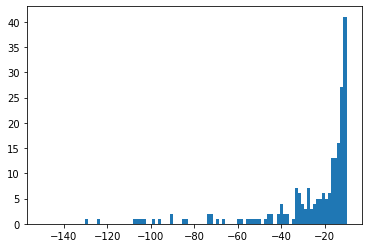

In [14]:
## for the feature V14
# Step 5, step 6
y_val_V14_array = np.array(X_val.iloc[:,13]).reshape(-1,1)
X_train_V14_array = np.array(X_train.iloc[:,13]).reshape(-1,1)
X_val_V14_array = np.array(X_val.iloc[:,13]).reshape(-1,1)

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V14_array)
p_V14_val = model.score_samples(X_val_V14_array)
p_V14_train = model.score_samples(X_train_V14_array)
_ = plt.hist (p_V14_val ,range = [-150,-10], bins = 100)


In [15]:
## for the feature V14
# Step 5, step 6
from sklearn.metrics import f1_score
f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    
    y_pred_total_val= []
    for i in  p_V14_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)     
        
    y_pred_total_train= []
    for i in  p_V14_train:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_train.append(y_pred)  
        
    # validation dataset   
    f1_V14_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_V14_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_V14_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_V14_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index= f1_scores_val.index(max(f1_scores_val))



print('optimal theshold is ',thres[thres_index])
print('max f1 score for Validation is',max(f1_scores_val))
print('max f1 score for Training is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index])
print('the precision score for training data set is',precision_train[thres_index])
print('the recall score for validation data set is ',recall_val[thres_index])
print('the recall score for validation data set is ',recall_train[thres_index])



optimal theshold is  -18.4848484848485
max f1 score for Validation is 0.6130653266331658
max f1 score for Training is 0.6047297297297297
the precision score for validation data set is  0.5980392156862745
the precision score for training data set is 0.5838509316770186
the recall score for validation data set is  0.6288659793814433
the recall score for validation data set is  0.5802469135802469


### Part 2, a, Step 5，Step 6 for the feature <font color ='Blue'>V17

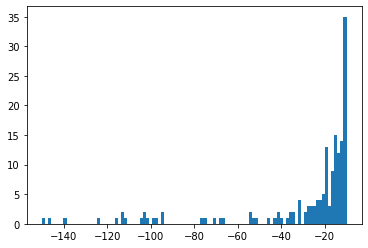

In [16]:

## for the feature V17
# Step 5, step 6
y_val_V17_array = np.array(X_val.iloc[:,16]).reshape(-1,1)
X_train_V17_array = np.array(X_train.iloc[:,16]).reshape(-1,1)
X_val_V17_array = np.array(X_val.iloc[:,16]).reshape(-1,1)

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V17_array)
p_V17_val = model.score_samples(X_val_V17_array)
p_V17_train = model.score_samples(X_train_V17_array)
_ = plt.hist (p_V17_val ,range = [-150,-10], bins = 100)


In [17]:
## for the feature V17
# Step 5, step 6
from sklearn.metrics import f1_score
f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    
    y_pred_total_val= []
    for i in  p_V17_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)     
        
    y_pred_total_train= []
    for i in  p_V17_train:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_train.append(y_pred)  
        
    # validation dataset   
    f1_V17_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_V17_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_V17_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_V17_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index= f1_scores_val.index(max(f1_scores_val))



print('optimal theshold is ',thres[thres_index])
print('max f1 score for Validation is',max(f1_scores_val))
print('max f1 score for Training is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index])
print('the precision score for training data set is',precision_train[thres_index])
print('the recall score for validation data set is ',recall_val[thres_index])
print('the recall score for validation data set is ',recall_train[thres_index])



optimal theshold is  -21.313131313131322
max f1 score for Validation is 0.5942857142857142
max f1 score for Training is 0.5744680851063831
the precision score for validation data set is  0.5098039215686274
the precision score for training data set is 0.5
the recall score for validation data set is  0.7123287671232876
the recall score for validation data set is  0.644


### Part 2, a, Step 5，Step 6 for the feature <font color ='Blue'>V10

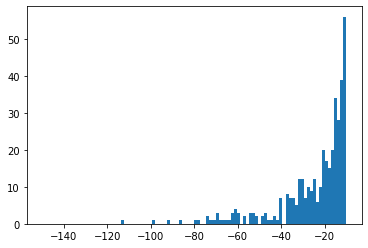

In [18]:
## for the feature V10
# Step 5, step 6
y_val_V10_array = np.array(X_val.iloc[:,9]).reshape(-1,1)
X_train_V10_array = np.array(X_train.iloc[:,9]).reshape(-1,1)
X_val_V10_array = np.array(X_val.iloc[:,9]).reshape(-1,1)

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V10_array)
p_V10_val = model.score_samples(X_val_V10_array)
p_V10_train = model.score_samples(X_train_V10_array)
_ = plt.hist (p_V10_val ,range = [-150,-10], bins = 100)



In [19]:
## for the feature V10
# Step 5, step 6
from sklearn.metrics import f1_score
f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    
    y_pred_total_val= []
    for i in  p_V10_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)     
        
    y_pred_total_train= []
    for i in  p_V10_train:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_train.append(y_pred)  
        
    # validation dataset   
    f1_V10_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_V10_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_V10_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_V10_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index= f1_scores_val.index(max(f1_scores_val))



print('optimal theshold is ',thres[thres_index])
print('max f1 score for Validation is',max(f1_scores_val))
print('max f1 score for Training is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index])
print('the precision score for training data set is',precision_train[thres_index])
print('the recall score for validation data set is ',recall_val[thres_index])
print('the recall score for validation data set is ',recall_train[thres_index])



optimal theshold is  -24.141414141414145
max f1 score for Validation is 0.20576131687242796
max f1 score for Training is 0.24821002386634844
the precision score for validation data set is  0.24509803921568626
the precision score for training data set is 0.2577639751552795
the recall score for validation data set is  0.1773049645390071
the recall score for validation data set is  0.16435643564356436


### Part 2, a, Step 7 
    
 <font color ='Blue'> **The complexity of my method is O(n^2), because I have 2 for loop**

### Part 2, b, Step 1, Step 2
- first calculate the AUC, then calcualte each features F1

In [20]:
# part b
# repeat for only class 0
from sklearn.mixture import GaussianMixture
from sklearn import metrics

score_training_total=[]
score_validation_total=[]
auc_train_total=[]
auc_val_total=[]

thres_train_total = []
thres_val_total = []

X_train_0 = X_train[y_train==0]
#X_val_0 = X_val[y_val == 0 ]
y_train_0=y_train[y_train == 0 ]
#y_val_0=y_val[y_val == 0 ]

# Step 1 
for i in (13,16,9):
    # need to change it into array
    X_train_array=np.array(X_train_0.iloc[:,i]).reshape(-1,1)
    X_val_array = np.array(X_val.iloc[:,i]).reshape(-1,1)
    gm = GaussianMixture(n_components=1, random_state=0, covariance_type = 'full')
    gm.fit(X_train_array)
    
    # Step 2 
    # use score samples to fit the score sample
    #score_training = gm.score_samples(X_train_array)
    score_validation_1 = gm.score_samples(X_val_array)
    #score_training_total.append(score_training)
    #score_validation_total.append(score_validation_1)
   
    
    
    # step 3 find the AUC for training & validation , f_train -> false positive for train
    # T_TRAIN-> true positive
    #f_train, t_train, thres_train = metrics.roc_curve(y_train_0,1-score_training)
    f_val, t_val, thres_val = metrics.roc_curve(y_val,1-score_validation_1)
    #auc_train= metrics.auc(f_train, t_train)
    auc_val= metrics.auc(f_val, t_val)
    #auc_train_total.append(auc_train)
    auc_val_total.append(auc_val)
     
    #add the threshold

    thres_train_total.append(thres_train)
    thres_val_total.append(thres_val)
    
# create a df which show the auc_train and auc_val
auc = pd.DataFrame({'features':['V14','V17','V10'], 'Auc_Validation': auc_val_total})
auc

,features,Auc_Validation
0,V14,0.954915
1,V17,0.925267
2,V10,0.917267


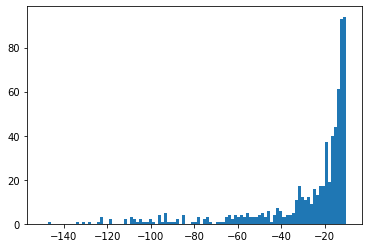

In [21]:
## for the feature V14
# Step 5, step 6
X_train_V14_array_0 = np.array(X_train[y_train==0].iloc[:,13]).reshape(-1,1)
X_train_V14_array = np.array(X_train.iloc[:,13]).reshape(-1,1)
X_val_V14_array = np.array(X_val.iloc[:,13]).reshape(-1,1)

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V14_array)
p_V14_val = model.score_samples(X_val_V14_array)
p_V14_train = model.score_samples(X_train_V14_array)
_ = plt.hist (p_V14_train ,range = [-150,-10], bins = 100)


In [22]:
# for V14
from sklearn import metrics
from sklearn.metrics import f1_score
f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    
    y_pred_total_val= []
    for i in  p_V14_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)     
        
    y_pred_total_train= []
    for i in  p_V14_train:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_train.append(y_pred)  
        
    # validation dataset   
    f1_V14_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_V14_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_V14_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_V14_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index= f1_scores_val.index(max(f1_scores_val))



print('optimal theshold is ',thres[thres_index])
print('max f1 score for Validation is',max(f1_scores_val))
print('max f1 score for Training is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index])
print('the precision score for training data set is',precision_train[thres_index])
print('the recall score for validation data set is ',recall_val[thres_index])
print('the recall score for validation data set is ',recall_train[thres_index])



optimal theshold is  -18.4848484848485
max f1 score for Validation is 0.6130653266331658
max f1 score for Training is 0.6047297297297297
the precision score for validation data set is  0.5980392156862745
the precision score for training data set is 0.5838509316770186
the recall score for validation data set is  0.6288659793814433
the recall score for validation data set is  0.5802469135802469


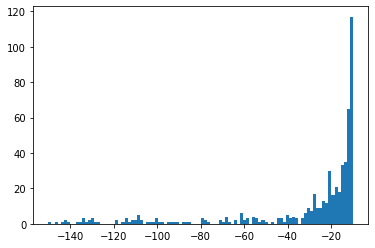

In [23]:
## for the feature V17
# Step 5, step 6

X_train_V17_array_0 = np.array(X_train[y_train==0].iloc[:,16]).reshape(-1,1)
X_train_V17_array = np.array(X_train.iloc[:,16]).reshape(-1,1)
X_val_V17_array = np.array(X_val.iloc[:,16]).reshape(-1,1)

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V17_array)
p_V17_val = model.score_samples(X_val_V17_array)
p_V17_train = model.score_samples(X_train_V17_array)
_ = plt.hist (p_V17_train ,range = [-150,-10], bins = 100)


In [24]:
# for V17
from sklearn.metrics import f1_score
f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    
    y_pred_total_val= []
    for i in  p_V17_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)     
        
    y_pred_total_train= []
    for i in  p_V17_train:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_train.append(y_pred)  
        
    # validation dataset   
    f1_V17_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_V17_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_V17_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_V17_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index= f1_scores_val.index(max(f1_scores_val))



print('optimal theshold is ',thres[thres_index])
print('max f1 score for Validation is',max(f1_scores_val))
print('max f1 score for Training is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index])
print('the precision score for training data set is',precision_train[thres_index])
print('the recall score for validation data set is ',recall_val[thres_index])
print('the recall score for validation data set is ',recall_train[thres_index])



optimal theshold is  -21.313131313131322
max f1 score for Validation is 0.5942857142857142
max f1 score for Training is 0.5744680851063831
the precision score for validation data set is  0.5098039215686274
the precision score for training data set is 0.5
the recall score for validation data set is  0.7123287671232876
the recall score for validation data set is  0.644


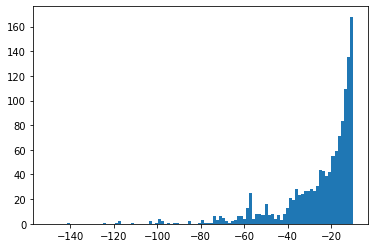

In [25]:
## for the feature V10
# Step 5, step 6

X_train_V10_array_0 = np.array(X_train[y_train==0].iloc[:,9]).reshape(-1,1)
X_train_V10_array = np.array(X_train.iloc[:,9]).reshape(-1,1)
X_val_V10_array = np.array(X_val.iloc[:,9]).reshape(-1,1)

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V10_array)
p_V10_val = model.score_samples(X_val_V10_array)
p_V10_train = model.score_samples(X_train_V10_array)
_ = plt.hist (p_V10_train ,range = [-150,-10], bins = 100)


In [26]:

from sklearn.metrics import f1_score
f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    
    y_pred_total_val= []
    for i in  p_V10_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)     
        
    y_pred_total_train= []
    for i in  p_V10_train:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_train.append(y_pred)  
        
    # validation dataset   
    f1_V10_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_V10_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_V10_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_V10_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index= f1_scores_val.index(max(f1_scores_val))



print('optimal theshold is ',thres[thres_index])
print('max f1 score for Validation is',max(f1_scores_val))
print('max f1 score for Training is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index])
print('the precision score for training data set is',precision_train[thres_index])
print('the recall score for validation data set is ',recall_val[thres_index])
print('the recall score for validation data set is ',recall_train[thres_index])


optimal theshold is  -24.141414141414145
max f1 score for Validation is 0.20576131687242796
max f1 score for Training is 0.24821002386634844
the precision score for validation data set is  0.24509803921568626
the precision score for training data set is 0.2577639751552795
the recall score for validation data set is  0.1773049645390071
the recall score for validation data set is  0.16435643564356436


### Part 2, b, Step 3

In [27]:
# according to the previous calculation
compare= pd.DataFrame(data={'Feature': ['V14', 'V17', 'V10'],\
                            'AUC-partA': ['0.955065','0.925698','0.917279'],'AUC-PartB': ['0.954915','0.925267','0.917267'],\
                            'F1-partA': ['0.61306','0.59428','0.20576'], ' F1-PartB': ['0.61306','0.59428','0.20576']})
compare.index = compare.iloc[:,0]
compare.drop(columns=['Feature'],inplace=True)
compare

,AUC-partA,AUC-PartB,F1-partA,F1-PartB
Feature,,,,
V14,0.955065,0.954915,0.61306,0.61306
V17,0.925698,0.925267,0.59428,0.59428
V10,0.917279,0.917267,0.20576,0.20576


### Part 2, b, Step 4

<font color ='Blue'> **They are very similar, which is almost the same, especially for the F1 score. The reason of it because this dataset is a unbalanced data, there is a huge percentage of the non-fraud, so which is really similar to the original dataset.**

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




### Part 3 a) Step 1, Step 2, Step 3

In [28]:
# Part a 1): Pick two features (say, f1 and f2), select V1, V2
X_train_V1 =X_train['V1']
X_train_V2 =X_train['V2']

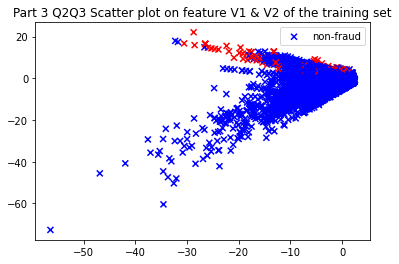

In [29]:
# Part a 2) 3): Scatter plot (plt.scatter) those features of the training set on a figur

# get the class = 0
color= ['blue' if i == 0 else 'red' for i in y_train]
plt.scatter(X_train['V1'],X_train['V2'],marker="x", color = color,label = 'non-fraud')
plt.title('Part 3 Q2Q3 Scatter plot on feature V1 & V2 of the training set')
plt.legend()


### Part 3 a) Step 4
<font color='Blue'>**I would only use component 1. because it only has 1 cluster here.**

### Part 3 a) Step 5, Step 6

In [30]:
X_train_V12 = X_train[['V1','V2']]
X_val_V12 = X_val[['V1','V1']]

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V12)

score_train = model.score_samples(X_train_V12)
score_validation = model.score_samples(X_val_V12)

f_val_train, t_val_train, thres_val_train = metrics.roc_curve(y_train,1-score_train)
f_val, t_val, thres_val = metrics.roc_curve(y_val,1-score_validation)

auc_train= metrics.auc(f_val_train, t_val_train)
auc_val= metrics.auc(f_val, t_val)

print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)


AUC for training set is: 0.8479918687756826
AUC for validation set is: 0.716042153759147


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- V2

  warnings.warn(message, FutureWarning)


### Part 3 a) Step 7  first pair:  <font color='Blue'> V3, V4


In [31]:
# first pair: V3, V4
# second pair: V10, V11
# third pair : V13, V14

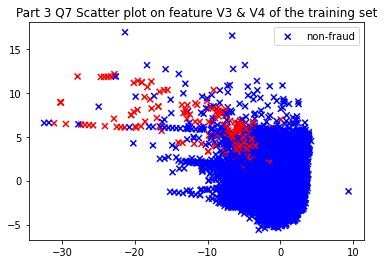

In [32]:
# Part a 1): Pick two features (say, f1 and f2), select V3, V4
X_train_V3 =X_train['V3']
X_train_V4 =X_train['V4']

# Part a 2): Scatter plot (plt.scatter) those features of the training set on a figur
# get the class = 0
color= ['blue' if i == 0 else 'red' for i in y_train]
plt.scatter(X_train['V3'],X_train['V4'],marker="x", color = color,label = 'non-fraud')
plt.title('Part 3 Q7 Scatter plot on feature V3 & V4 of the training set')
plt.legend()


In [33]:
X_train_V34 = X_train[['V3','V4']]
X_val_V34 = X_val[['V3','V4']]

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V34)

score_train = model.score_samples(X_train_V34)
score_validation = model.score_samples(X_val_V34)

f_val_train, t_val_train, thres_val_train = metrics.roc_curve(y_train,1-score_train)
f_val, t_val, thres_val = metrics.roc_curve(y_val,1-score_validation)

auc_train= metrics.auc(f_val_train, t_val_train)
auc_val= metrics.auc(f_val, t_val)

print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.9225757564095889
AUC for validation set is: 0.9101553178429304


### Part 3 a) Step 7  Second pair:  <font color='Blue'> V10, V11

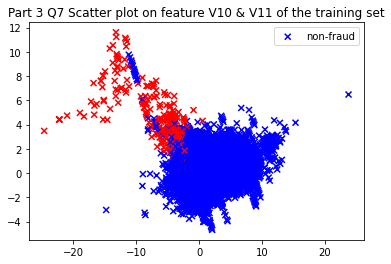

In [34]:
# Part a 1): Pick two features (say, f1 and f2), select V3, V4
X_train_V10 =X_train['V10']
X_train_V11 =X_train['V11']

# Part a 2): Scatter plot (plt.scatter) those features of the training set on a figur
# get the class = 0
color= ['blue' if i == 0 else 'red' for i in y_train]
plt.scatter(X_train['V10'],X_train['V11'],marker="x", color = color,label = 'non-fraud')
plt.title('Part 3 Q7 Scatter plot on feature V10 & V11 of the training set')
plt.legend()


In [35]:
X_train_V1011 = X_train[['V10','V11']]
X_val_V1011 = X_val[['V10','V11']]

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V1011)

score_train = model.score_samples(X_train_V1011)
score_validation = model.score_samples(X_val_V1011)

f_val_train, t_val_train, thres_val_train = metrics.roc_curve(y_train,1-score_train)
f_val, t_val, thres_val = metrics.roc_curve(y_val,1-score_validation)

auc_train= metrics.auc(f_val_train, t_val_train)
auc_val= metrics.auc(f_val, t_val)

print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.9269168873645888
AUC for validation set is: 0.9143155186802122


### Part 3 a) Step 7  Third pair:  <font color='Blue'> V13, V14

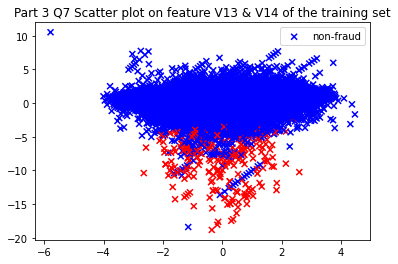

In [36]:
# Part a 1): Pick two features (say, f1 and f2), select V13, V14
X_train_V13 =X_train['V13']
X_train_V14 =X_train['V14']

# Part a 2): Scatter plot (plt.scatter) those features of the training set on a figur
# get the class = 0
color= ['blue' if i == 0 else 'red' for i in y_train]
plt.scatter(X_train['V13'],X_train['V14'],marker="x", color = color,label = 'non-fraud')
plt.title('Part 3 Q7 Scatter plot on feature V13 & V14 of the training set')
plt.legend()


In [37]:
X_train_V1314 = X_train[['V13','V14']]
X_val_V1314 = X_val[['V13','V14']]

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V1314)

score_train = model.score_samples(X_train_V1314)
score_validation = model.score_samples(X_val_V1314)

f_val_train, t_val_train, thres_val_train = metrics.roc_curve(y_train,1-score_train)
f_val, t_val, thres_val = metrics.roc_curve(y_val,1-score_validation)

auc_train= metrics.auc(f_val_train, t_val_train)
auc_val= metrics.auc(f_val, t_val)

print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.9492918872847648
AUC for validation set is: 0.9498643037939762



### Part 3 a) Step 8 

<font color='Blue'>**Answer: I pick V13 and V14, because they have the highest AUC**

### Part 3 a) Step 9

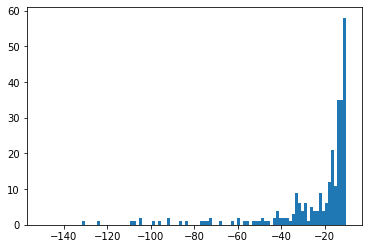

In [38]:
## for the feature V13V14

X_train_V1314_array = np.array(X_train[['V13','V14']]).reshape(-1,2)
X_val_V1314_array = np.array(X_val[['V13','V14']]).reshape(-1,2)
    
model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V1314_array)
p_V1314_val = model.score_samples(X_val_V1314_array)
_ = plt.hist (p_V1314_val ,range = [-150,-10], bins = 100)


In [39]:
# find the threshold for V13 and V14
from sklearn.metrics import f1_score

f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    
    y_pred_total_val= []
    for i in  p_V1314_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)     
         
    # validation dataset   
    f1_V10_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_V10_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
thres_index= f1_scores_val.index(max(f1_scores_val))



print('optimal theshold for V13 and V14 is ',thres[thres_index])
print('max f1 score for Validation is',max(f1_scores_val))


optimal theshold for V13 and V14 is  -21.313131313131322
max f1 score for Validation is 0.6122448979591838


### Part 3 a) Step 10

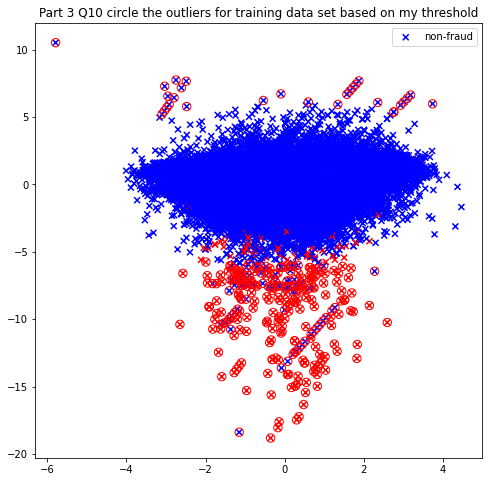

In [40]:
# training data set
plt.figure(figsize=(8,8))
color= ['blue' if i == 0 else 'red' for i in y_train]
plt.scatter(X_train['V13'],X_train['V14'],marker="x", color = color,label = 'non-fraud')
plt.legend()

threshold= -21.31
c = model.score_samples(X_train_V1314_array)

outliers = np.nonzero(c<threshold)[0]
plt.scatter(X_train_V1314_array[outliers,0],X_train_V1314_array[outliers,1],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.title('Part 3 Q10 circle the outliers for training data set based on my threshold')
plt.show()

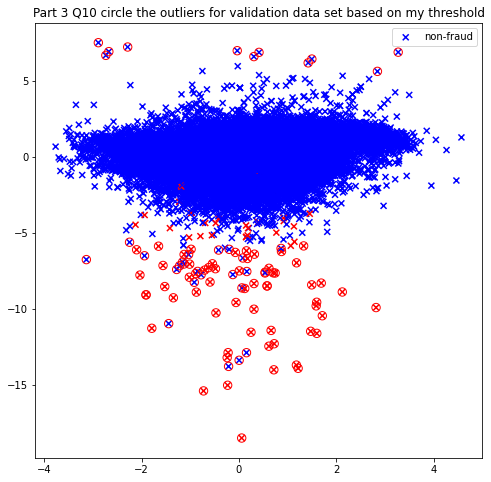

In [41]:
# training data set
plt.figure(figsize=(8,8))
color= ['blue' if i == 0 else 'red' for i in y_val]
plt.scatter(X_val['V13'],X_val['V14'],marker="x", color = color,label = 'non-fraud')
plt.legend()

threshold= -21.31
c = model.score_samples(X_val_V1314_array)

outliers = np.nonzero(c<threshold)[0]
plt.scatter(X_val_V1314_array[outliers,0],X_val_V1314_array[outliers,1],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.title('Part 3 Q10 circle the outliers for validation data set based on my threshold')
plt.show()


### Part 3 b) Step 1

<font color='Blue'> **I pick V14, V17, V10, because they have the highest scores from part 2**

### Part 3 b) Step 2

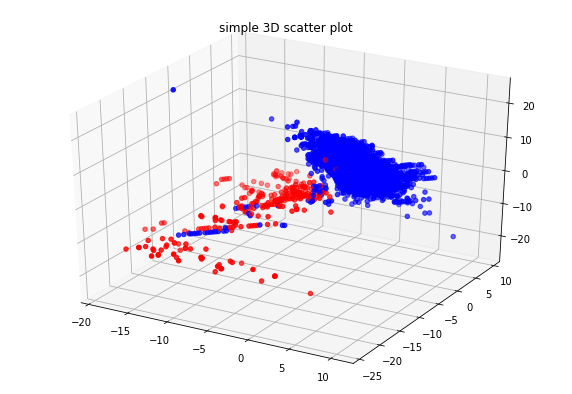

In [42]:
# step 2, step 3
x =X_train['V14']
y =X_train['V17']
z =X_train['V10']
color= ['blue' if i == 0 else 'red' for i in y_train]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = color)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

**I would like to use component = 1**

In [43]:
X_train_V141710 = X_train[['V14','V17','V10']]
X_val_V141710 = X_val[['V14','V17','V10']]

model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V141710)

score_train = model.score_samples(X_train_V141710)
score_validation = model.score_samples(X_val_V141710)

f_val_train, t_val_train, thres_val_train = metrics.roc_curve(y_train,1-score_train)
f_val, t_val, thres_val = metrics.roc_curve(y_val,1-score_validation)

auc_train= metrics.auc(f_val_train, t_val_train)
auc_val= metrics.auc(f_val, t_val)

print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)


AUC for training set is: 0.9575829948488153
AUC for validation set is: 0.9649226169539219


### Part 3 b) Step 3

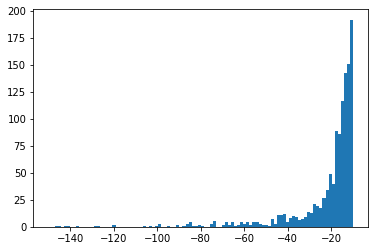

In [44]:
## for the feature V14 V17 V10
# Step 5, step 6

X_train_V141710_array = np.array(X_train[['V14','V17','V10']]).reshape(-1,3)
X_val_V141710_array = np.array(X_val[['V14','V17','V10']]).reshape(-1,3)
    
model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_V141710_array)
p_V141710_val = model.score_samples(X_val_V141710_array)
_ = plt.hist (p_V141710_val ,range = [-150,-10], bins = 100)


In [45]:
# find the threshold for V13 and V14
from sklearn.metrics import f1_score

f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    
    y_pred_total_val= []
    for i in  p_V141710_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)     
         
    # validation dataset   
    f1_V10_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_V10_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
thres_index= f1_scores_val.index(max(f1_scores_val))



print('optimal theshold for V14 and V17 V10 is ',thres[thres_index])
print('max f1 score for Validation is',max(f1_scores_val))


optimal theshold for V14 and V17 V10 is  -65.15151515151516
max f1 score for Validation is 0.5999999999999999


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

### Part 4 part 1, part 2

In [46]:
# part 1 part 2

# non-fraudulent transactions 

from sklearn.mixture import GaussianMixture
from sklearn import metrics

X_train0 = X_train['V16'][y_train==0]
#X_val0 =X_val['V1'][y_val==0]

X_train_array0=np.array(X_train0).reshape(-1,1)
#X_val_array0 = np.array(X_val0).reshape(-1,1)

G1 = GaussianMixture(n_components=1)
G1.fit(X_train_array0)

#### fraudulent transactions

X_train1 = X_train['V16'][y_train==1]
#X_val1 =X_val['V1'][y_val==1]

X_train_array1=np.array(X_train1).reshape(-1,1)
#X_val_array1 = np.array(X_val1).reshape(-1,1)

G2 = GaussianMixture(n_components=1)
G2.fit(X_train_array1)


GaussianMixture()

### Part 4 Step 3

In [47]:
S1 = G1.score_samples(np.array(X_val[['V16']])).reshape(-1,1)
S2 = G2.score_samples(np.array(X_val[['V16']])).reshape(-1,1)

### Part 4 Step 4

In [48]:
score_f1 = []
precision_val = []
recall_val = []

C=np.linspace(0.1,10,100)

for c in C: 
    y_pred_total=[]
    #S1_copy = S1.copy()
    for i in range(len(S1)):
        
        if S1[i] < c * S2[i]:
            y_pred=1
        else:
            y_pred = 0

        y_pred_total.append(y_pred)

    score_f1.append(f1_score(y_val, y_pred_total))
    c_index= score_f1.index(max(score_f1))
    prec_val = precision_score(y_pred_total,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total,y_val)
    recall_val.append(rec_val)
    
    
print('optimal C is ',C[c_index])
print('max f1 score for Validation is',max(score_f1))
print('the precision score for validation data set is ',precision_val[c_index])
print('the recall score for validation data set is ',recall_val[c_index])


optimal C is  5.2
max f1 score for Validation is 0.5696969696969697
the precision score for validation data set is  0.46078431372549017
the recall score for validation data set is  0.746031746031746


### Part 4 Step 5

In [49]:
import warnings
warnings.filterwarnings("ignore")

best_C=[]
best_f1=[]
best_precision =[]
best_recall = []
C=np.linspace(0.1,10,100)

for x in (X_train.columns):
    
    all_f1_for_this_feature=[]
    all_recall_for_this_feature=[]
    all_precision_for_this_feature=[]
    
    X_train0 = X_train[x][y_train==0]
    X_train_array0=np.array(X_train0).reshape(-1,1)

    G1 = GaussianMixture(n_components=1)
    G1.fit(X_train_array0)

    #### fraudulent transactions

    X_train1 = X_train[x][y_train==1]
    X_train_array1=np.array(X_train1).reshape(-1,1)
    
    G2 = GaussianMixture(n_components=1)
    G2.fit(X_train_array1)

    S1 = G1.score_samples(np.array(X_val[[x]])).reshape(-1,1)
    S2 = G2.score_samples(np.array(X_val[[x]])).reshape(-1,1)


    for c in C: 
        y_pred_total=[]
        
        #S1_copy = S1.copy()
        for i in range(len(S1)):

            if S1[i] < c * S2[i]:
                y_pred=1
            else:
                y_pred = 0

            y_pred_total.append(y_pred)
        
        #仅这一个f1
        f1_for_this_c=f1_score(y_val, y_pred_total)
        #把所有的c加在一起的f1， 100个f1
        all_f1_for_this_feature.append(f1_for_this_c)
        #对于所有c 选出这个feature里最大的f1 (只有1项) ----- best_f1_feature_c
        best_f1_feature_c = max(all_f1_for_this_feature)
        #选出最大的index of c
        c_index= all_f1_for_this_feature.index(best_f1_feature_c)
        #选出最大的C
        C_col= C[c_index]
        
        ####
        #仅这一个recall
        recall_for_this_c=recall_score(y_pred_total,y_val)
        #把所有的c加在一起的recall， 100个recall
        all_recall_for_this_feature.append(recall_for_this_c)
        #对于所有c 选出这个feature里最大的f1 (只有1项) ----- best_recall_feature_c
        best_recall_feature_c=all_recall_for_this_feature[c_index]
        
        ####
        #仅这一个precision
        precision_for_this_c=precision_score(y_pred_total,y_val)
        #把所有的c加在一起的 precision， 100个precision
        all_precision_for_this_feature.append(precision_for_this_c)
        #对于所有c 选出这个feature里最大的f1 (只有1项) ----- best_precision_feature_c
        best_precision_feature_c=all_precision_for_this_feature[c_index]
        
        
        ###############
    best_C.append(C_col)
    best_f1.append(best_f1_feature_c)
    best_recall.append(best_recall_feature_c)
    best_precision.append(best_precision_feature_c)

In [50]:
val_table = pd.DataFrame(data={'Feature': X_train.columns, 'Best F1 score': best_f1, 'Optimal C score': best_C,'Best recall': best_recall,'Best Precision': best_precision})
val_table.index = val_table.iloc[:,0]
val_table.drop(columns=['Feature'],inplace=True)
val_table


,Best F1 score,Optimal C score,Best recall,Best Precision
Feature,,,,
V1,0.152381,6.6,0.148148,0.156863
V2,0.175439,5.9,0.833333,0.098039
V3,0.312139,7.6,0.380282,0.264706
V4,0.377358,4.2,0.363636,0.392157
V5,0.193939,8.3,0.253968,0.156863
V6,0.118812,1.9,0.079470,0.235294
V7,0.237113,10.0,0.250000,0.225490
V8,0.104167,6.9,0.080645,0.147059
V9,0.448980,3.4,0.733333,0.323529


### Part 4 Step 6

<font color = 'Blue'>**We can not report AUC for this model, because there are two Gaussion model cross each other, and they have the coincide, then they must have a point where TPR and FPR are the same for these two model curves, so we can not say which AUC is high or low, and the scores S1 and S2, we can not use 2 scores to find one auc. so I think the AUC is not really useful.**

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

### Model 1:  2 Gaussion model, multiple features  - V14, V17, V10,  single component for non-fraud and 3 component for fraud

In [51]:
# part 1 part 2

X_train0 = X_train[['V14','V17','V10']][y_train==0]
X_train_array0=np.array(X_train0).reshape(-1,3)

G1 = GaussianMixture(n_components=1)
G1.fit(X_train_array0)

X_train1 = X_train[['V14','V17','V10']][y_train==1]
X_train_array1=np.array(X_train1).reshape(-1,3)

G2 = GaussianMixture(n_components=3)
G2.fit(X_train_array1)

S1_val = G1.score_samples(np.array(X_val[['V14','V17','V10']])).reshape(-1,1)
S1_train = G1.score_samples(np.array(X_train[['V14','V17','V10']])).reshape(-1,1)

S2_val = G2.score_samples(np.array(X_val[['V14','V17','V10']])).reshape(-1,1)
S2_train = G2.score_samples(np.array(X_train[['V14','V17','V10']])).reshape(-1,1)

fpr_gm_val_S1, tpr_gm_val_S1, thres_val_S1 = roc_curve(y_val, 1-S1_val)
fpr_gm_val_S2, tpr_gm_val_S2, thres_val_S2 = roc_curve(y_val, 1-S2_val)

fpr_gm_train_S1, tpr_gm_train_S1, thres_train_S1 = roc_curve(y_train, 1-S1_train)
fpr_gm_train_S2, tpr_gm_train_S2, thres_train_S2 = roc_curve(y_train, 1-S2_train)

AUC_val=metrics.auc(fpr_gm_val_S1, tpr_gm_val_S1)
AUC_train=metrics.auc(fpr_gm_train_S1, tpr_gm_train_S1)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

ACU for validation set is 0.9630130420089247
ACU for training set is 0.9567912249137154


In [52]:
f1_scores_val = []
precision_val = []
recall_val = []

f1_scores_train = []
precision_train = []
recall_train = []

C=np.linspace(0.1,10,100)

for c in C: 
    y_pred_total_val=[]
    y_pred_total_train=[] 
    #S1_copy = S1.copy()
    for i in range(len(S1_val)):
        
        if S1_val[i] < c * S2_val[i]:
            y_pred=1
        else:
            y_pred = 0
        y_pred_total_val.append(y_pred)
        
    for i in range(len(S1_train)):
        
        if S1_train[i] < c * S2_train[i]:
            y_pred=1
        else:
            y_pred = 0

        y_pred_total_train.append(y_pred)


     # validation dataset   
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))    
    
#print('optimal C is ',C[c_index])


print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

max f1 score for validation set is 0.801980198019802
max f1 score for training set is 0.7827426810477658
the precision score for validation data set is  0.7941176470588235
the precision score for training data set is 0.7888198757763976
the recall score for validation data set is  0.81
the recall score for train data set is  0.7767584097859327


In [53]:
model1 = pd.DataFrame(data={'Feature': ['V14 & V17 & V10'], '# of Gaussion model': 2,\
                            '# of component': 'Non-fraud:1, Fraud:3',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model1.index = model1.iloc[:,0]
model1['AUC-Val'] = np.nan
model1['AUC-Train'] = np.nan
model1.drop(columns=['Feature'],inplace=True)
model1

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17 & V10,2,"Non-fraud:1, Fraud:3",NaN,NaN,0.80198,0.782743,0.81,0.776758,0.794118,0.78882


###### The reason is the type of the non-fraud is almost the same, but for the fraud, they may have different type of fraud.

### Model 2:  2 Gaussion model, multiple features  - V14, V17, V10 single component for non-fraud and 5 component for fraud

In [54]:
# part 1 part 2

X_train0 = X_train[['V14','V17','V10']][y_train==0]
X_train_array0=np.array(X_train0).reshape(-1,3)

G1 = GaussianMixture(n_components=1)
G1.fit(X_train_array0)

X_train1 = X_train[['V14','V17','V10']][y_train==1]
X_train_array1=np.array(X_train1).reshape(-1,3)

G2 = GaussianMixture(n_components=5)
G2.fit(X_train_array1)

S1_val = G1.score_samples(np.array(X_val[['V14','V17','V10']])).reshape(-1,1)
S1_train = G1.score_samples(np.array(X_train[['V14','V17','V10']])).reshape(-1,1)

S2_val = G2.score_samples(np.array(X_val[['V14','V17','V10']])).reshape(-1,1)
S2_train = G2.score_samples(np.array(X_train[['V14','V17','V10']])).reshape(-1,1)

fpr_gm_val_S1, tpr_gm_val_S1, thres_val_S1 = roc_curve(y_val, 1-S1_val)
fpr_gm_val_S2, tpr_gm_val_S2, thres_val_S2 = roc_curve(y_val, 1-S2_val)

fpr_gm_train_S1, tpr_gm_train_S1, thres_train_S1 = roc_curve(y_train, 1-S1_train)
fpr_gm_train_S2, tpr_gm_train_S2, thres_train_S2 = roc_curve(y_train, 1-S2_train)

AUC_val=metrics.auc(fpr_gm_val_S1, tpr_gm_val_S1)
AUC_train=metrics.auc(fpr_gm_train_S1, tpr_gm_train_S1)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

ACU for validation set is 0.9630130420089247
ACU for training set is 0.9567912249137154


In [55]:
f1_scores_val = []
precision_val = []
recall_val = []

f1_scores_train = []
precision_train = []
recall_train = []

C=np.linspace(0.1,10,100)

for c in C: 
    y_pred_total_val=[]
    y_pred_total_train=[] 
    #S1_copy = S1.copy()
    for i in range(len(S1_val)):
        
        if S1_val[i] < c * S2_val[i]:
            y_pred=1
        else:
            y_pred = 0
        y_pred_total_val.append(y_pred)
        
    for i in range(len(S1_train)):
        
        if S1_train[i] < c * S2_train[i]:
            y_pred=1
        else:
            y_pred = 0

        y_pred_total_train.append(y_pred)


     # validation dataset   
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))    
    
#print('optimal C is ',C[c_index])


print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

max f1 score for validation set is 0.8059701492537314
max f1 score for training set is 0.7876923076923077
the precision score for validation data set is  0.7941176470588235
the precision score for training data set is 0.7950310559006211
the recall score for validation data set is  0.8181818181818182
the recall score for train data set is  0.7804878048780488


In [56]:
model2 = pd.DataFrame(data={'Feature': ['V14 & V17 & V10'], '# of Gaussion model': 2,\
                            '# of component': 'Non-fraud:1, Fraud:5',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model2.index = model2.iloc[:,0]
model2['AUC-Val'] = np.nan
model2['AUC-Train'] = np.nan
model2.drop(columns=['Feature'],inplace=True)
model2

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17 & V10,2,"Non-fraud:1, Fraud:5",NaN,NaN,0.80597,0.787692,0.818182,0.780488,0.794118,0.795031


### Model 3:  2 Gaussion model, multiple features  - V14, V17, V10, V27, V20  single component for non-fraud and 5 component for fraud

In [57]:
# part 1 part 2

X_train0 = X_train[['V14','V17','V10','V27','V20']][y_train==0]
X_train_array0=np.array(X_train0).reshape(-1,5)

G1 = GaussianMixture(n_components=1)
G1.fit(X_train_array0)

X_train1 = X_train[['V14','V17','V10','V27','V20']][y_train==1]
X_train_array1=np.array(X_train1).reshape(-1,5)

G2 = GaussianMixture(n_components=5)
G2.fit(X_train_array1)

S1_val = G1.score_samples(np.array(X_val[['V14','V17','V10','V27','V20']])).reshape(-1,1)
S1_train = G1.score_samples(np.array(X_train[['V14','V17','V10','V27','V20']])).reshape(-1,1)

S2_val = G2.score_samples(np.array(X_val[['V14','V17','V10','V27','V20']])).reshape(-1,1)
S2_train = G2.score_samples(np.array(X_train[['V14','V17','V10','V27','V20']])).reshape(-1,1)

fpr_gm_val_S1, tpr_gm_val_S1, thres_val_S1 = roc_curve(y_val, 1-S1_val)
fpr_gm_val_S2, tpr_gm_val_S2, thres_val_S2 = roc_curve(y_val, 1-S2_val)

fpr_gm_train_S1, tpr_gm_train_S1, thres_train_S1 = roc_curve(y_train, 1-S1_train)
fpr_gm_train_S2, tpr_gm_train_S2, thres_train_S2 = roc_curve(y_train, 1-S2_train)

AUC_val=metrics.auc(fpr_gm_val_S1, tpr_gm_val_S1)
AUC_train=metrics.auc(fpr_gm_train_S1, tpr_gm_train_S1)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

ACU for validation set is 0.9637987695957736
ACU for training set is 0.9627590174974517


In [58]:
f1_scores_val = []
precision_val = []
recall_val = []

f1_scores_train = []
precision_train = []
recall_train = []

C=np.linspace(0.1,10,100)

for c in C: 
    y_pred_total_val=[]
    y_pred_total_train=[] 
    #S1_copy = S1.copy()
    for i in range(len(S1_val)):
        
        if S1_val[i] < c * S2_val[i]:
            y_pred=1
        else:
            y_pred = 0
        y_pred_total_val.append(y_pred)
        
    for i in range(len(S1_train)):
        
        if S1_train[i] < c * S2_train[i]:
            y_pred=1
        else:
            y_pred = 0

        y_pred_total_train.append(y_pred)


     # validation dataset   
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))    
    
#print('optimal C is ',C[c_index])


print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

max f1 score for validation set is 0.758974358974359
max f1 score for training set is 0.7512038523274479
the precision score for validation data set is  0.7254901960784313
the precision score for training data set is 0.7267080745341615
the recall score for validation data set is  0.7956989247311828
the recall score for train data set is  0.7774086378737541


In [59]:
model3 = pd.DataFrame(data={'Feature': ['V14 & V17 & V10 & V27 & V20'], '# of Gaussion model': 2,\
                            '# of component': 'Non-fraud:1, Fraud:5',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model3.index = model3.iloc[:,0]
model3['AUC-Val'] = np.nan
model3['AUC-Train'] = np.nan
model3.drop(columns=['Feature'],inplace=True)
model3

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17 & V10 & V27 & V20,2,"Non-fraud:1, Fraud:5",NaN,NaN,0.758974,0.751204,0.795699,0.777409,0.72549,0.726708


### Model 4:  2 Gaussion model, multiple features  - V14, V17, V10, V27, V20  single component for non-fraud and 3 component for fraud

In [60]:
# part 1 part 2

X_train0 = X_train[['V14','V17','V10','V27','V20']][y_train==0]
X_train_array0=np.array(X_train0).reshape(-1,5)

G1 = GaussianMixture(n_components=1)
G1.fit(X_train_array0)

X_train1 = X_train[['V14','V17','V10','V27','V20']][y_train==1]
X_train_array1=np.array(X_train1).reshape(-1,5)

G2 = GaussianMixture(n_components=3)
G2.fit(X_train_array1)

S1_val = G1.score_samples(np.array(X_val[['V14','V17','V10','V27','V20']])).reshape(-1,1)
S1_train = G1.score_samples(np.array(X_train[['V14','V17','V10','V27','V20']])).reshape(-1,1)

S2_val = G2.score_samples(np.array(X_val[['V14','V17','V10','V27','V20']])).reshape(-1,1)
S2_train = G2.score_samples(np.array(X_train[['V14','V17','V10','V27','V20']])).reshape(-1,1)

fpr_gm_val_S1, tpr_gm_val_S1, thres_val_S1 = roc_curve(y_val, 1-S1_val)
fpr_gm_val_S2, tpr_gm_val_S2, thres_val_S2 = roc_curve(y_val, 1-S2_val)

fpr_gm_train_S1, tpr_gm_train_S1, thres_train_S1 = roc_curve(y_train, 1-S1_train)
fpr_gm_train_S2, tpr_gm_train_S2, thres_train_S2 = roc_curve(y_train, 1-S2_train)

AUC_val=metrics.auc(fpr_gm_val_S1, tpr_gm_val_S1)
AUC_train=metrics.auc(fpr_gm_train_S1, tpr_gm_train_S1)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

ACU for validation set is 0.9637987695957736
ACU for training set is 0.9627590174974517


In [61]:
f1_scores_val = []
precision_val = []
recall_val = []

f1_scores_train = []
precision_train = []
recall_train = []

C=np.linspace(0.1,10,100)

for c in C: 
    y_pred_total_val=[]
    y_pred_total_train=[] 
    #S1_copy = S1.copy()
    for i in range(len(S1_val)):
        
        if S1_val[i] < c * S2_val[i]:
            y_pred=1
        else:
            y_pred = 0
        y_pred_total_val.append(y_pred)
        
    for i in range(len(S1_train)):
        
        if S1_train[i] < c * S2_train[i]:
            y_pred=1
        else:
            y_pred = 0

        y_pred_total_train.append(y_pred)


     # validation dataset   
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))    
    
#print('optimal C is ',C[c_index])


print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

max f1 score for validation set is 0.782122905027933
max f1 score for training set is 0.7692307692307693
the precision score for validation data set is  0.6862745098039216
the precision score for training data set is 0.6987577639751553
the recall score for validation data set is  0.9090909090909091
the recall score for train data set is  0.8555133079847909


In [62]:
model4 = pd.DataFrame(data={'Feature': ['V14 & V17 & V10 & V27 & V20'], '# of Gaussion model': 2,\
                            '# of component': 'Non-fraud:1, Fraud:3',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model4.index = model4.iloc[:,0]
model4['AUC-Val'] = np.nan
model4['AUC-Train'] = np.nan
model4.drop(columns=['Feature'],inplace=True)
model4

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17 & V10 & V27 & V20,2,"Non-fraud:1, Fraud:3",NaN,NaN,0.782123,0.769231,0.909091,0.855513,0.686275,0.698758


### Model 5:  1 Gaussion model, multiple features  - V14, V17, V10,  component 1 for both class.

In [63]:

X_train_array = np.array(X_train[['V14','V17','V10']]).reshape(-1,3)
X_val_array = np.array(X_val[['V14','V17','V10']]).reshape(-1,3)
    
model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_array)

p_val = model.score_samples(X_val_array)
p_train = model.score_samples(X_train_array)

fpr_gm_val, tpr_gm_val, thres_val = roc_curve(y_val, 1-p_val)
fpr_gm_train, tpr_gm_train, thres_train = roc_curve(y_train, 1-p_train)

AUC_val=metrics.auc(fpr_gm_val, tpr_gm_val)
AUC_train=metrics.auc(fpr_gm_train, tpr_gm_train)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    y_pred_total_train = []
    y_pred_total_val= []
    for i in  p_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)  
     
    for j in  p_train:
        if j > x:
            y_pred_train = 0
        else:
            y_pred_train = 1
        y_pred_total_train.append(y_pred_train) 
    
         
      
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    f1_train= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_train)
    
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))

#print('optimal theshold for V14 and V17 V10 is ',thres[thres_index])

print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

ACU for validation set is 0.9649226169539219
ACU for training set is 0.9575829948488153
max f1 score for validation set is 0.5999999999999999
max f1 score for training set is 0.5527156549520766
the precision score for validation data set is  0.5294117647058824
the precision score for training data set is 0.5372670807453416
the recall score for validation data set is  0.6923076923076923
the recall score for train data set is  0.569078947368421


In [64]:
model5 = pd.DataFrame(data={'Feature': ['V14 & V17 & V10'],'# of Gaussion model': 1,\
                            '# of component': 'Non-fraud:1, Fraud:1',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model5.index = model5.iloc[:,0]
model5.drop(columns=['Feature'],inplace=True)
model5

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17 & V10,1,"Non-fraud:1, Fraud:1",0.964923,0.957583,0.6,0.552716,0.692308,0.569079,0.529412,0.537267


### Model 6:  1 Gaussion model, multiple features  - V14, V17,  component 3 for both class.

In [65]:
import warnings
warnings.filterwarnings("ignore")

X_train_array = np.array(X_train[['V14','V17']]).reshape(-1,2)
X_val_array = np.array(X_val[['V14','V17']]).reshape(-1,2)
    
model = GaussianMixture(n_components=3, random_state=0)
model.fit(X_train_array)

p_val = model.score_samples(X_val_array)
p_train = model.score_samples(X_train_array)

fpr_gm_val, tpr_gm_val, thres_val = roc_curve(y_val, 1-p_val)
fpr_gm_train, tpr_gm_train, thres_train = roc_curve(y_train, 1-p_train)

AUC_val=metrics.auc(fpr_gm_val, tpr_gm_val)
AUC_train=metrics.auc(fpr_gm_train, tpr_gm_train)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    y_pred_total_train = []
    y_pred_total_val= []
    for i in  p_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)  
     
    for j in  p_train:
        if j > x:
            y_pred_train = 0
        else:
            y_pred_train = 1
        y_pred_total_train.append(y_pred_train) 
    
         
      
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    f1_train= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_train)
    
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))

#print('optimal theshold for V14 and V17 is ',thres[thres_index])

print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

ACU for validation set is 0.9628835529991104
ACU for training set is 0.956900205663564
max f1 score for validation set is 0.5925925925925927
max f1 score for training set is 0.5728314238952537
the precision score for validation data set is  0.5490196078431373
the precision score for training data set is 0.5434782608695652
the recall score for validation data set is  0.6436781609195402
the recall score for train data set is  0.6055363321799307


In [66]:
model6 = pd.DataFrame(data={'Feature': ['V14 & V17'], '# of Gaussion model': 1,\
                            '# of component': 'Non-fraud:3, Fraud:3',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model6.index = model6.iloc[:,0]
model6.drop(columns=['Feature'],inplace=True)
model6

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17,1,"Non-fraud:3, Fraud:3",0.962884,0.9569,0.592593,0.572831,0.643678,0.605536,0.54902,0.543478


### Model 7:  1 Gaussion model, single features  - V14,  component 1 for both class.

In [67]:
X_train_array = np.array(X_train[['V14']]).reshape(-1,1)
X_val_array = np.array(X_val[['V14']]).reshape(-1,1)
    
model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_array)

p_val = model.score_samples(X_val_array)
p_train = model.score_samples(X_train_array)

fpr_gm_val, tpr_gm_val, thres_val = roc_curve(y_val, 1-p_val)
fpr_gm_train, tpr_gm_train, thres_train = roc_curve(y_train, 1-p_train)

AUC_val=metrics.auc(fpr_gm_val, tpr_gm_val)
AUC_train=metrics.auc(fpr_gm_train, tpr_gm_train)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    y_pred_total_train = []
    y_pred_total_val= []
    for i in  p_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)  
     
    for j in  p_train:
        if j > x:
            y_pred_train = 0
        else:
            y_pred_train = 1
        y_pred_total_train.append(y_pred_train) 
    
         
      
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    f1_train= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_train)
    
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))

#print('optimal theshold for V14 is ',thres[thres_index])

print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

ACU for validation set is 0.9550654169511631
ACU for training set is 0.9480139640555438
max f1 score for validation set is 0.6130653266331658
max f1 score for training set is 0.6047297297297297
the precision score for validation data set is  0.5980392156862745
the precision score for training data set is 0.5559006211180124
the recall score for validation data set is  0.6288659793814433
the recall score for train data set is  0.662962962962963


In [68]:
model7 = pd.DataFrame(data={'Feature': ['V14'],'# of Gaussion model': 1,\
                            '# of component': 'Non-fraud:1, Fraud:1',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model7.index = model7.iloc[:,0]
model7.drop(columns=['Feature'],inplace=True)
model7

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14,1,"Non-fraud:1, Fraud:1",0.955065,0.948014,0.613065,0.60473,0.628866,0.662963,0.598039,0.555901


### Model 8:  1 Gaussion model, multiple features  - V14, V17,  component 1 for both class.

In [69]:
X_train_array = np.array(X_train[['V14','V17']]).reshape(-1,2)
X_val_array = np.array(X_val[['V14','V17']]).reshape(-1,2)
    
model = GaussianMixture(n_components=1, random_state=0)
model.fit(X_train_array)

p_val = model.score_samples(X_val_array)
p_train = model.score_samples(X_train_array)

fpr_gm_val, tpr_gm_val, thres_val = roc_curve(y_val, 1-p_val)
fpr_gm_train, tpr_gm_train, thres_train = roc_curve(y_train, 1-p_train)

AUC_val=metrics.auc(fpr_gm_val, tpr_gm_val)
AUC_train=metrics.auc(fpr_gm_train, tpr_gm_train)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    y_pred_total_train = []
    y_pred_total_val= []
    for i in  p_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)  
     
    for j in  p_train:
        if j > x:
            y_pred_train = 0
        else:
            y_pred_train = 1
        y_pred_total_train.append(y_pred_train) 
    
         
      
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    f1_train= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_train)
    
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))

#print('optimal theshold for V14 and V17 is ',thres[thres_index])

print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

ACU for validation set is 0.9617390149869304
ACU for training set is 0.9573976015361967
max f1 score for validation set is 0.6844919786096256
max f1 score for training set is 0.6848137535816619
the precision score for validation data set is  0.6274509803921569
the precision score for training data set is 0.7422360248447205
the recall score for validation data set is  0.7529411764705882
the recall score for train data set is  0.6356382978723404


In [70]:
model8 = pd.DataFrame(data={'Feature': ['V14 & V17'],'# of Gaussion model': 1,\
                            '# of component': 'Non-fraud:1, Fraud:1',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model8.index = model8.iloc[:,0]
model8.drop(columns=['Feature'],inplace=True)
model8

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17,1,"Non-fraud:1, Fraud:1",0.961739,0.957398,0.684492,0.684814,0.752941,0.635638,0.627451,0.742236


### Model 9:  1 Gaussion model, single features  - V14,  component 3 for both class.

In [71]:
X_train_array = np.array(X_train[['V14']]).reshape(-1,1)
X_val_array = np.array(X_val[['V14']]).reshape(-1,1)
    
model = GaussianMixture(n_components=3, random_state=0)
model.fit(X_train_array)

p_val = model.score_samples(X_val_array)
p_train = model.score_samples(X_train_array)

fpr_gm_val, tpr_gm_val, thres_val = roc_curve(y_val, 1-p_val)
fpr_gm_train, tpr_gm_train, thres_train = roc_curve(y_train, 1-p_train)

AUC_val=metrics.auc(fpr_gm_val, tpr_gm_val)
AUC_train=metrics.auc(fpr_gm_train, tpr_gm_train)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

f1_scores_val=[]
f1_scores_train=[]
precision_val = []
precision_train = []
recall_val = []
recall_train = []

thres=np.linspace(-150,-10,100)

for x in thres:
    y_pred_total_train = []
    y_pred_total_val= []
    for i in  p_val:
        if i > x:
            y_pred = 0
        else:
            y_pred = 1
        y_pred_total_val.append(y_pred)  
     
    for j in  p_train:
        if j > x:
            y_pred_train = 0
        else:
            y_pred_train = 1
        y_pred_total_train.append(y_pred_train) 
    
         
      
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    f1_train= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_train)
    
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))

#print('optimal theshold for V14 is ',thres[thres_index])

print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

ACU for validation set is 0.9559276999579289
ACU for training set is 0.9483561484855239
max f1 score for validation set is 0.5212121212121211
max f1 score for training set is 0.5203883495145631
the precision score for validation data set is  0.4215686274509804
the precision score for training data set is 0.4161490683229814
the recall score for validation data set is  0.6825396825396826
the recall score for train data set is  0.694300518134715


In [72]:
model9 = pd.DataFrame(data={'Feature': ['V14'],'# of Gaussion model': 1,\
                            '# of component': 'Non-fraud:3, Fraud:3',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model9.index = model9.iloc[:,0]
model9.drop(columns=['Feature'],inplace=True)
model9

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14,1,"Non-fraud:3, Fraud:3",0.955928,0.948356,0.521212,0.520388,0.68254,0.694301,0.421569,0.416149


### Model 10:  2 Gaussion model, multiple features  - V14, V17, V10, V1, V2, V3, V5,  2 component for non-fraud and 5 component for fraud

In [73]:
# part 1 part 2

X_train0 = X_train[['V14','V17','V10','V1','V2','V3','V5']][y_train==0]
X_train_array0=np.array(X_train0).reshape(-1,7)

G1 = GaussianMixture(n_components=2)
G1.fit(X_train_array0)

X_train1 = X_train[['V14','V17','V10','V1','V2','V3','V5']][y_train==1]
X_train_array1=np.array(X_train1).reshape(-1,7)

G2 = GaussianMixture(n_components=5)
G2.fit(X_train_array1)

S1_val = G1.score_samples(np.array(X_val[['V14','V17','V10','V1','V2','V3','V5']])).reshape(-1,1)
S1_train = G1.score_samples(np.array(X_train[['V14','V17','V10','V1','V2','V3','V5']])).reshape(-1,1)

S2_val = G2.score_samples(np.array(X_val[['V14','V17','V10','V1','V2','V3','V5']])).reshape(-1,1)
S2_train = G2.score_samples(np.array(X_train[['V14','V17','V10','V1','V2','V3','V5']])).reshape(-1,1)

fpr_gm_val_S1, tpr_gm_val_S1, thres_val_S1 = roc_curve(y_val, 1-S1_val)
fpr_gm_val_S2, tpr_gm_val_S2, thres_val_S2 = roc_curve(y_val, 1-S2_val)

fpr_gm_train_S1, tpr_gm_train_S1, thres_train_S1 = roc_curve(y_train, 1-S1_train)
fpr_gm_train_S2, tpr_gm_train_S2, thres_train_S2 = roc_curve(y_train, 1-S2_train)

AUC_val=metrics.auc(fpr_gm_val_S1, tpr_gm_val_S1)
AUC_train=metrics.auc(fpr_gm_train_S1, tpr_gm_train_S1)
print('ACU for validation set is', AUC_val)
print('ACU for training set is', AUC_train)

ACU for validation set is 0.9572227624781886
ACU for training set is 0.9589131649787732


In [74]:
f1_scores_val = []
precision_val = []
recall_val = []

f1_scores_train = []
precision_train = []
recall_train = []

C=np.linspace(0.1,10,100)

for c in C: 
    y_pred_total_val=[]
    y_pred_total_train=[] 
    #S1_copy = S1.copy()
    for i in range(len(S1_val)):
        
        if S1_val[i] < c * S2_val[i]:
            y_pred=1
        else:
            y_pred = 0
        y_pred_total_val.append(y_pred)
        
    for i in range(len(S1_train)):
        
        if S1_train[i] < c * S2_train[i]:
            y_pred=1
        else:
            y_pred = 0

        y_pred_total_train.append(y_pred)


     # validation dataset   
    f1_val= f1_score(y_pred_total_val,y_val) 
    f1_scores_val.append(f1_val)
    prec_val = precision_score(y_pred_total_val,y_val)
    precision_val.append(prec_val)
    rec_val = recall_score(y_pred_total_val,y_val)
    recall_val.append(rec_val)
    
    #train dataset 
    f1_training= f1_score(y_pred_total_train,y_train) 
    f1_scores_train.append(f1_training)
    prec_training = precision_score(y_pred_total_train,y_train)
    precision_train.append(prec_training)
    rec_training = recall_score(y_pred_total_train,y_train)
    recall_train.append(rec_training)
    
thres_index_val= f1_scores_val.index(max(f1_scores_val))
thres_index_train= f1_scores_train.index(max(f1_scores_train))    
    
#print('optimal C is ',C[c_index])


print('max f1 score for validation set is',max(f1_scores_val))
print('max f1 score for training set is',max(f1_scores_train))
print('the precision score for validation data set is ',precision_val[thres_index_val])
print('the precision score for training data set is',precision_train[thres_index_train])
print('the recall score for validation data set is ',recall_val[thres_index_val])
print('the recall score for train data set is ',recall_train[thres_index_train])

max f1 score for validation set is 0.792079207920792
max f1 score for training set is 0.7850746268656716
the precision score for validation data set is  0.7843137254901961
the precision score for training data set is 0.8167701863354038
the recall score for validation data set is  0.8
the recall score for train data set is  0.7557471264367817


In [75]:
model10 = pd.DataFrame(data={'Feature': ['V14 & V17 & V10 & V1 & V2 & V3 & V5'], '# of Gaussion model': 2,\
                            '# of component': 'Non-fraud:2, Fraud:5',\
                            'AUC-Val': AUC_val,'AUC-Train': AUC_train,\
                            'Best F1-Val': max(f1_scores_val), 'Best F1-Train': max(f1_scores_train),\
                            'Best recall-Val': recall_val[thres_index_val],'Best recall-Train': recall_train[thres_index_train],\
                            'Best Precision-Val': precision_val[thres_index_val],'Best Precision-Train': precision_train[thres_index_train]})
model10.index = model10.iloc[:,0]
model10['AUC-Val'] = np.nan
model10['AUC-Train'] = np.nan
model10.drop(columns=['Feature'],inplace=True)
model10

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17 & V10 & V1 & V2 & V3 & V5,2,"Non-fraud:2, Fraud:5",NaN,NaN,0.792079,0.785075,0.8,0.755747,0.784314,0.81677


In [76]:
total = pd.concat([model1,model2,model3,model4,model5,model6,model7,model8,model9,model10])
total

,# of Gaussion model,# of component,AUC-Val,AUC-Train,Best F1-Val,Best F1-Train,Best recall-Val,Best recall-Train,Best Precision-Val,Best Precision-Train
Feature,,,,,,,,,,
V14 & V17 & V10,2,"Non-fraud:1, Fraud:3",NaN,NaN,0.801980,0.782743,0.810000,0.776758,0.794118,0.788820
V14 & V17 & V10,2,"Non-fraud:1, Fraud:5",NaN,NaN,0.805970,0.787692,0.818182,0.780488,0.794118,0.795031
V14 & V17 & V10 & V27 & V20,2,"Non-fraud:1, Fraud:5",NaN,NaN,0.758974,0.751204,0.795699,0.777409,0.725490,0.726708
V14 & V17 & V10 & V27 & V20,2,"Non-fraud:1, Fraud:3",NaN,NaN,0.782123,0.769231,0.909091,0.855513,0.686275,0.698758
V14 & V17 & V10,1,"Non-fraud:1, Fraud:1",0.964923,0.957583,0.600000,0.552716,0.692308,0.569079,0.529412,0.537267
V14 & V17,1,"Non-fraud:3, Fraud:3",0.962884,0.956900,0.592593,0.572831,0.643678,0.605536,0.549020,0.543478
V14,1,"Non-fraud:1, Fraud:1",0.955065,0.948014,0.613065,0.604730,0.628866,0.662963,0.598039,0.555901
V14 & V17,1,"Non-fraud:1, Fraud:1",0.961739,0.957398,0.684492,0.684814,0.752941,0.635638,0.627451,0.742236
V14,1,"Non-fraud:3, Fraud:3",0.955928,0.948356,0.521212,0.520388,0.682540,0.694301,0.421569,0.416149


#### Question: What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components?

<font color = 'Blue'> **According to my table, the model with <u>multiple components for the fraud transaction</u> are works better. The model with <u>3 features</u> which has highest AUC <u>(V14, V17, V10)</u> are the best. <u>2</u> Gaussians are better. <u>Components = 3</u> is better.**

#### Question: Why does it make sense to have multiple components for the fraudulent transactions?
<font color = 'Blue'>  **It is make sense because the fraud transactions may not all the same, they might have lots of different type of fraud transactions, which means it may have lots of clusters represent the fraud transactions, so we can use the multiple components.**

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [77]:
# The first model perform best 

# part 1 part 2

X_train0 = X_train[['V14','V17','V10']][y_train==0]
X_train_array0=np.array(X_train0).reshape(-1,3)

G1 = GaussianMixture(n_components=1)
G1.fit(X_train_array0)

X_train1 = X_train[['V14','V17','V10']][y_train==1]
X_train_array1=np.array(X_train1).reshape(-1,3)

G2 = GaussianMixture(n_components=3)
G2.fit(X_train_array1)

S1_test = G1.score_samples(np.array(X_test[['V14','V17','V10']])).reshape(-1,1)

S2_test = G2.score_samples(np.array(X_test[['V14','V17','V10']])).reshape(-1,1)

fpr_gm_S1, tpr_gm_S1, thres_S1 = roc_curve(y_test, 1-S1_test)
fpr_gm_S2, tpr_gm_S2, thres_S2 = roc_curve(y_test, 1-S2_test)

AUC_test_S1=metrics.auc(fpr_gm_S1, tpr_gm_S1)
AUC_test_S2=metrics.auc(fpr_gm_S2, tpr_gm_S2)

print('ACU for test set for model 1 is', AUC_test_S1)
print('ACU for test set for model 2 is', AUC_test_S2)


ACU for test set for model 1 is 0.9827628055020011
ACU for test set for model 2 is 0.8442787932446857


In [78]:
f1_scores = []
precision= []
recall = []

C=np.linspace(0.1,10,100)

for c in C: 
    y_pred_total=[]
    for i in range(len(S1_test)):
        
        if S1_test[i] < c * S2_test[i]:
            y_pred=1
        else:
            y_pred = 0
        y_pred_total.append(y_pred)

    # test dataset   
    f1= f1_score(y_pred_total,y_test) 
    f1_scores.append(f1)
    
    prec = precision_score(y_pred_total,y_test)
    precision.append(prec)
    
    rec = recall_score(y_pred_total,y_test)
    recall.append(rec)
    

thres_index= f1_scores.index(max(f1_scores))

print('max f1 score for test set is',max(f1_scores))
print('the precision score for validation data set is ',precision[thres_index])
print('the recall score for validation data set is ',recall[thres_index])


max f1 score for test set is 0.8472222222222222
the precision score for validation data set is  0.8970588235294118
the recall score for validation data set is  0.8026315789473685


In [79]:
model_test = pd.DataFrame(data={'Feature': ['V14 & V17 & V10'],'# of Gaussion model': 2,\
                            '# of component': 'Non-fraud:1, Fraud:3',\
                            'AUC-Test': AUC_test_S1,\
                            'Best F1': max(f1_scores),\
                            'Best recall': recall[thres_index],\
                            'Best Precision': precision[thres_index]})
model_test.index = model_test.iloc[:,0]
model_test.drop(columns=['Feature'],inplace=True)
model_test

,# of Gaussion model,# of component,AUC-Test,Best F1,Best recall,Best Precision
Feature,,,,,,
V14 & V17 & V10,2,"Non-fraud:1, Fraud:3",0.982763,0.847222,0.802632,0.897059


In [80]:
%%shell
jupyter nbconvert --to html /content/W22_APS1070_Project_2.ipynb

[NbConvertApp] Converting notebook /content/W22_APS1070_Project_2.ipynb to html
[NbConvertApp] Writing 1906410 bytes to /content/W22_APS1070_Project_2.html
